# Playing with the Gaussian Distribution

There was a [statement](http://imgur.com/gallery/ng3w1vt) I saw online: "I don't know anyone with an IQ above 7 that respects Hillary Clinton."

Of course, the person is trying to sound smart and snarky but I don't think they pull it off very well.  My first reaction was to show them how dumb they are, because arguments online are always a good idea, right?  I didn't say anything, as I usually don't.  Whatever.  I thought I'd write down how to think about standard scores like this instead.

Before I start, there are interesting discussions about why IQ is an outdated idea.  For example:

> There is no reason to believe, and much reason not to believe, that the measure of so-called "Intelligence Quotient" in any way reflects some basic cognitive capacity or "natural kind" of the human mind.  The domain-general measure of IQ isn't motivated by any recent discovery of cognitive or developmental psychology.

_Atran S. 2015. IQ. In: Brockman J, editor. This idea must die: scientific ideas that are blocking progress. New York, New York: Harper Perennial. p. 15._

Notwithstanding, let's have a little fun with this, or brush up on some statistics using Python.

## Getting Started

The Stanford-Binet IQ test is an intelligence test standardized for a median of 100 and a standard deviation of 15.  That means that someone with an IQ of 100 has about as many people smarter than them as there are less intelligent.  It also means that we can calculate about where someone fits in the population if their score is different than 100. 

We'll use a Gaussian distribution to describe the scores.  This is the bell curve we've all probably seen before, where most things group up in the middle and the exceptional items are found to the left and right of the center: 

![bell curve](http://i.imgur.com/1R5fEBm.gif)

To figure out what a test score says about a person, we'll:

* compare the test score to the everyone else (calculate the z-score)
* figure out the proportion of people with lower scores (calculate the probability)
* understand the conclusions

## Calculate the Z-Score

The z-score is the distance between an observed value and the mean value divided by the standard deviation.  For IQ scores, we'll use the median for the mean, since I don't have (or couldn't be bothered to find) better data.  Here's the formula: 

$$z = \frac{x_{i} - \mu}{\sigma}$$

where $x_{i}$ is the observed value, $\mu$ is the mean and $\sigma$ is the standard deviation.

Put another way, the mean measures the middle of normal data and the standard deviation measures the width.  If it's wide, there's a lot of variance in the data, and if it's narrow, almost everything comes out near the mean value.  The z-score measures how different an observation is from the middle of the data.  There's [another discussion](http://math.stackexchange.com/questions/133701/how-does-one-gain-an-intuitive-understanding-of-the-z-score-table) of this that might be useful.

So, calculating the z-score is our first step so that we can compare the teset score to everyone else's test score.

Let's do this with Python.


In [16]:
def z_score(x, m, s):
    return (x - m) / s

I created a function that takes the observation, mean and standard deviation and returns the z-score.  Notice it's just a little bit of arithmetic.  

Here are a few examples, testing our method.

In [135]:
print(z_score(95, 100, 15), z_score(130, 100, 15), z_score(7, 100, 15))
# We should see -0.3333333333333333 2.0 -6.2 or 1/3 deviation below average, 2 above and 6.2 below.

-0.3333333333333333 2.0 -6.2


## Calculate the Probability

Given the z-score, we can calculate the probability of someone being smarter or less-intelligent than observed.  To do this, we need to estimate the area under the correct part of the curve.  Looking at our curve again, we have 

![bell curve](http://i.imgur.com/1R5fEBm.gif)

Notice the numbers along the bottom? Those are z-scores.  So, if we have a z-score of -3, we'll know that anyone less intelligent than that is about 0.1% of the population.  We take the perctage from under the curve in that region to get the answer of 0.1%  If we have a z-score of -2.5, we add up the first two areas (0.1% and 0.5%) to figure out that 0.6% of people are less intelligent than that test score.  If we get a z-score of 1, we'd add all the numbers from left to the z-score of 1 and get about 84.1%.

[SciPy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) has a normal distribution with a cdf function, or the Cumulative Distribution Function.  That's the function that measures the area of a curve, up to a point.  To use this function, we write:

In [40]:
import scipy.stats as st

def p(x, m, s):
    z = z_score(x, m, s)
    return st.norm.cdf(z)

Here, I use p for probability, or the probability that an observation will be lower than the value provided.  I pass in the observation, the mean and the standard deviation.  The function looks up my z-score for me and then calls SciPy's CDF function on the normal distribution.  

Let's calculate this for a few z-scores.  I'll use pandas to create a data frame, because they print neatly.

In [71]:
import numpy as np
import pandas as pd

scores = np.arange(60, 161, 20)
z_scores = list(map(lambda x: z_score(x, 100, 15), scores))
less_intelligent = list(map(lambda x: p(x, 100, 15), scores))
df = pd.DataFrame()
df['test_score'] = scores
df['z_score'] = z_scores
df['less_intelligent'] = less_intelligent
df

,test_score,z_score,less_intelligent
0,60,-2.666667,0.003830
1,80,-1.333333,0.091211
2,100,0.000000,0.500000
3,120,1.333333,0.908789
4,140,2.666667,0.996170
5,160,4.000000,0.999968


This code creates a pandas data frame by first setting a few sample test scores from 60 to 160.  Then calculating their z-scores and the proportion of the population estimated to be less intelligent than that score.  

So, someone with a score of 60 would have almost 4 people out of a thousand that are less intelligent.  Someone with a score of 160 would expect that in a room of 100,000, 3 would be more intelligent than they are.

This is a similar result that we see in the bell curve, only as applied with our mean of 100 and our standard deviation of 15.

## Understanding the Conclusions

Taking a few moments to calculate the probability of someone being less smart than a score reminds me how distributions work.  Maybe this was something most programmers learned and don't use often, so the knowledge gets a little dusty, a little less practical.  

I used matplotlib to create a graphic with our IQ distribution in it.  I just grabbed the [code](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) from the SciPy documentation and adjusted it for our mean and standard deviation. I also use the ggplot style, because I think it's pretty slick.

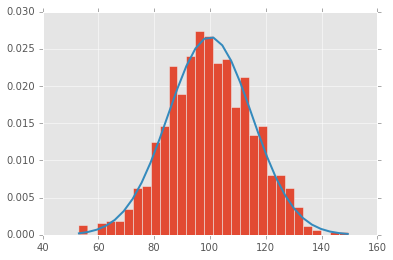

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
mu, sigma = 100, 15. # mean and standard deviation
s = sorted(np.random.normal(mu, sigma, 1000))
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.style.use('ggplot')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2)
plt.show()

The blue line shows us an approximation of the distribution.  I used 1,000 random observations to get my data.  I could have used 10,000 or 100,000 and the curve would look really slick.  However, that would hide a little what we actually mean when we talk about distributions.  If I took 1,000 students and gave them an IQ test, I would expect scores that were kind of blotchy like the red histogram in the plot.  Some categories would be a little above the curve, some below.  

As a side note, if I gave everyone in a school an IQ test and I saw that my results were skewed a little to the left or the right, I would probably conclude that the students in the school test better or worse than the population generally.  That, or something was different about the day, or the test, or grading of the test, or the collection of tests or something.  Seeing things different than expected is where the fun starts.

## What About the Snark?

Oh, and by the way, what about "I don't know anyone with an IQ above 7 that respects Hillary Clinton"?  

How common would it be to find someone with an IQ at 7?  Let's use our code to figure that out.

In [148]:
z = z_score(7, 100, 15)
prob = p(7, 100, 15)
rounded_prob = round(prob, 15)
print("The z-score {0} and probability {1} of a test score of 7.".format(z, rounded_prob))

The z-score -6.2 and probability 2.82316e-10 of a test score of 7.


That is, the z-score for a 7 test score is -6.2, or 6.2 standard deviations from the mean.  That's a very low score.  The probability that someone gets a lower score?  2.8e-10.  How small is that number?

In [144]:
instances_per_billion = round((1/prob) / 1000000000, 2)
people_on_the_planet = 7.125 # billion
instances_on_the_planet = people_on_the_planet / instances_per_billion
instances_on_the_planet

2.0127118644067798

Or, if the snarky comment were accurate, there would be 2 people that have an IQ lower than 7 on the planet.  Maybe both of us could have chilled out a little and came up with [funnier ways to tease](https://www.youtube.com/watch?v=JsJxIoFu2wo).

Interestingly, if we look at recent (9/21/15) [head-to-head polls](http://www.realclearpolitics.com/epolls/2016/president/2016_presidential_race.html) of Hillary Clinton against top Republican candidates, we see that:

In [151]:
votes = pd.Series([46.3, 45.3, 46.3, 46.3, 49.4, 47.8, 42.7, 43.3, 49.0, 47.7, 48.3, 46.5, 46.5, 49.0, 48.0])
# I thought it was easier to read percentages as 46.3, but I'm converting those numbers here to fit
# in the set [0,1] as well-behaved probabilities do.
votes = votes.apply(lambda x: x / 100) 
votes.describe()

count    15.000000
mean      0.468267
std       0.019670
min       0.427000
25%       0.463000
50%       0.465000
75%       0.481500
max       0.494000
dtype: float64

Or, from 15 hypothetical elections against various Republican candidates, about 46.8% would vote for former Secretary Clinton over her potential Republican rivals at this point.  It's interesting to point out that the standard deviation in all these polls is only about 2%.  Or, of all the Republican candidates, at this point very few people are thinking differently from party politics.  Either the particular candidates are not well known, or people are just that polarized that they'll vote for their party's candidate no matter who they run.

If we're facetious and say that only stupid people are voting for Hillary Clinton (from the commenter's snark), how would we find the IQ threshold?  Or, put another way, if you ranked US voters by intelligence, and assumed that the dumbest ones would vote for Hillary Clinton, and only the smart ones would vote Republican, what IQ score would these dumb ones have?

We can get the z-score like this:

In [149]:
hillary_z_score = st.norm.ppf(votes.mean())
hillary_z_score

-0.079627738240579449

So, the z-score is just about 1/10th of one standard deviation below the mean.  That is, it's going to be pretty close to 100.  

Using the z-score formula, we can solve for $x_{1}$ and get:

$$z = \frac{x_{i} - \mu}{\sigma}$$

$$x_{i} = \sigma z + \mu$$

Plugging our z-score number in, with our standard deviation and mean, we get:

In [150]:
iq = 15 * hillary_z_score + 100
iq

98.805583926391307

__Or, if I wanted to make an accurate stupidity joke, "I don't know anyone with an IQ above 98.8 that respects Hillary Clinton."__

Hope you had a little fun getting a practical refresher on normal distributions using Python.

### Resources:

Here are a few resources, if you want to look things up.

* [Code]()
* [IQ Classification](https://en.wikipedia.org/wiki/IQ_classification)
* [Head to Head Presidential Polls for Hillary Clinton](http://www.realclearpolitics.com/epolls/2016/president/2016_presidential_race.html)
* [z-score intuition](http://math.stackexchange.com/questions/133701/how-does-one-gain-an-intuitive-understanding-of-the-z-score-table)

In [152]:
print(df)

   test_score   z_score  less_intelligent
0          60 -2.666667          0.003830
1          80 -1.333333          0.091211
2         100  0.000000          0.500000
3         120  1.333333          0.908789
4         140  2.666667          0.996170
5         160  4.000000          0.999968
